In [1]:
import tensorflow as tf
import numpy as np
import shutil
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, DepthwiseConv2D, Activation, AveragePooling2D, Dropout, SeparableConv2D, Flatten, Dense, concatenate
from keras.utils import plot_model
from tensorflow.keras import backend as K
import os
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import LabelEncoder
import os
import random
import shutil

In [2]:
train_data_paths = [
    ('seizure med data/train_data/dilantin', 0),
    ('seizure med data/train_data/keppra', 1),
    ('seizure med data/train_data/none', 2)
]

In [3]:
test_data_paths = [
    ('seizure med data/test_data/dilantin', 0),
    ('seizure med data/test_data/keppra', 1),
    ('seizure med data/test_data/none', 2)
]

In [4]:
temp_dir = 'temp_dir'

In [8]:
# #previous data loader



# import os
# import numpy as np
# import tempfile
# import pickle

# def get_data_whole(folders_with_labels, temp_dir):
#     temp_files = []

#     for folder_path, label in folders_with_labels:
#         file_list = os.listdir(folder_path)
#         npy_files = [f for f in file_list if f.endswith('.npy')]

#         for file in npy_files:
#             file_path = os.path.join(folder_path, file)
#             try:
#                 loaded_data = np.load(file_path, allow_pickle=True)
#                 data_with_labels = [(sample, label) for sample in loaded_data]
#                 # Create a temporary file for each loaded data
#                 temp_file = tempfile.NamedTemporaryFile(delete=False, dir=temp_dir, suffix='.pkl')
#                 with open(temp_file.name, 'wb') as f:
#                     pickle.dump(data_with_labels, f)
#                 temp_files.append(temp_file.name)

#             except Exception as e:
#                 print(f"Error processing file {file} from {folder_path}: {e}")

#     return temp_files

# def load_data_from_temp_files(temp_files):
#     data = []
#     for temp_file in temp_files:
#         with open(temp_file, 'rb') as f:
#             loaded_data = pickle.load(f)
#             data.extend(loaded_data)
#         os.remove(temp_file)  # Clean up the temporary file after loading

#     return data

In [5]:
# import os
# import numpy as np
# import tempfile
# import pickle
# from sklearn.utils import shuffle

# def get_data_whole(folders_with_labels, temp_dir):
#     temp_files = []

#     for folder_path, label in folders_with_labels:
#         file_list = os.listdir(folder_path)
#         npy_files = [f for f in file_list if f.endswith('.npy')]

#         for file in npy_files:
#             file_path = os.path.join(folder_path, file)
#             try:
#                 loaded_data = np.load(file_path, allow_pickle=True)
#                 labels = np.full(len(loaded_data), label)
#                 # Create a temporary file for each loaded data and labels
#                 temp_file = tempfile.NamedTemporaryFile(delete=False, dir=temp_dir, suffix='.pkl')
#                 with open(temp_file.name, 'wb') as f:
#                     pickle.dump((loaded_data, labels), f)
#                 temp_files.append(temp_file.name)

#             except Exception as e:
#                 print(f"Error processing file {file} from {folder_path}: {e}")

#     return temp_files

# def load_data_from_temp_files(temp_files, max_samples=1000000, train_data=True):
#     all_samples = []
#     all_labels = []
    
#     for temp_file in temp_files:
#         with open(temp_file, 'rb') as f:
#             loaded_data, labels = pickle.load(f)
#             all_samples.append(loaded_data)
#             all_labels.append(labels)
#         os.remove(temp_file)  # Clean up the temporary file after loading

#     # Concatenate all samples and labels
#     all_samples = np.concatenate(all_samples, axis=0)
#     all_labels = np.concatenate(all_labels, axis=0)
    
#     if train_data:
#         # Separate data by class
#         class_data = {}
#         for sample, label in zip(all_samples, all_labels):
#             if label not in class_data:
#                 class_data[label] = []
#             class_data[label].append(sample)
        
#         # Determine the maximum number of samples per class
#         num_classes = len(class_data)
#         max_samples_per_class = max_samples // num_classes
        
#         balanced_samples = []
#         balanced_labels = []
#         for label, samples in class_data.items():
#             if len(samples) > max_samples_per_class:
#                 samples = np.random.choice(samples, max_samples_per_class, replace=False)
#             balanced_samples.extend(samples)
#             balanced_labels.extend([label] * len(samples))
        
#         all_samples = np.array(balanced_samples)
#         all_labels = np.array(balanced_labels)
    
#     # Shuffle the data and labels together
#     all_samples, all_labels = shuffle(all_samples, all_labels, random_state=42)

#     return all_samples, all_labels



In [5]:
import os
import numpy as np
import tempfile
import pickle
from sklearn.utils import shuffle

def get_data_whole(folders_with_labels, temp_dir):
    temp_files = []

    for folder_path, label in folders_with_labels:
        file_list = os.listdir(folder_path)
        npy_files = [f for f in file_list if f.endswith('.npy')]

        for file in npy_files:
            file_path = os.path.join(folder_path, file)
            try:
                loaded_data = np.load(file_path, allow_pickle=True)
                labels = np.full(len(loaded_data), label)
                # Create a temporary file for each loaded data and labels
                temp_file = tempfile.NamedTemporaryFile(delete=False, dir=temp_dir, suffix='.pkl')
                with open(temp_file.name, 'wb') as f:
                    pickle.dump((loaded_data, labels), f)
                temp_files.append(temp_file.name)

            except Exception as e:
                print(f"Error processing file {file} from {folder_path}: {e}")

    return temp_files

def load_data_from_temp_files(temp_files):
    all_samples = []
    all_labels = []
    
    for temp_file in temp_files:
        with open(temp_file, 'rb') as f:
            loaded_data, labels = pickle.load(f)
            all_samples.append(loaded_data)
            all_labels.append(labels)
        os.remove(temp_file)  # Clean up the temporary file after loading

    # Concatenate all samples and labels
    all_samples = np.concatenate(all_samples, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    # Shuffle the data and labels together
    all_samples, all_labels = shuffle(all_samples, all_labels, random_state=42)

    return all_samples, all_labels

In [6]:
train_temp_files = get_data_whole(train_data_paths, temp_dir)
X_train, y_train = load_data_from_temp_files(train_temp_files)

In [7]:
test_temp_files = get_data_whole(test_data_paths, temp_dir)
X_test, y_test = load_data_from_temp_files(test_temp_files)

In [8]:
label_encoder = LabelEncoder()
train_label_encoded = label_encoder.fit_transform(y_train)
test_label_encoded = label_encoder.fit_transform(y_test)

In [9]:
x_train = X_train.reshape(-1, 19, 50, 1) 
x_test = X_test.reshape(-1, 19, 50, 1) 

In [57]:
x_train.shape, x_test.shape

((2083031, 19, 50, 1), (505601, 19, 50, 1))

In [11]:
y_train.shape, y_test.shape

((2083031,), (505601,))

In [58]:
#count of classes intrain data before splitting

unique, counts = np.unique(y_train, return_counts = True)
train_data_no = dict(zip(unique, counts))
total_samples = np.sum(counts)

print("Label counts:", train_data_no)
print("Total number of samples:", total_samples)
print(train_data_no)

Label counts: {0: 534331, 1: 824677, 2: 724023}
Total number of samples: 2083031
{0: 534331, 1: 824677, 2: 724023}


In [59]:
#count of samples in each class in test data before splitting

unique, counts = np.unique(y_test, return_counts = True)
train_data_no = dict(zip(unique, counts))
total_samples = np.sum(counts)

print("Label counts:", train_data_no)
print("Total number of samples:", total_samples)
print(train_data_no)

Label counts: {0: 197402, 1: 153074, 2: 155125}
Total number of samples: 505601
{0: 197402, 1: 153074, 2: 155125}


In [125]:
# def create_triplets(images, labels, num_triplets=60000):
#     triplets = []
#     triplet_labels = []
#     num_classes = len(np.unique(labels))
#     for _ in range(num_triplets):
#         anchor_idx = np.random.randint(0, len(labels))
#         anchor_image = images[anchor_idx]
#         anchor_label = labels[anchor_idx]

#         pos_indices = np.where(labels == anchor_label)[0]
#         pos_idx = np.random.choice(pos_indices)
#         positive_image = images[pos_idx]

#         neg_indices = np.where(labels != anchor_label)[0]
#         neg_idx = np.random.choice(neg_indices)
#         negative_image = images[neg_idx]

#         triplets.append([anchor_image, positive_image, negative_image])
#         triplet_labels.append(anchor_label)  # The label of the anchor (can be used as triplet label)
        
#     return np.array(triplets), np.array(triplet_labels)

In [127]:
# train_dataset, train_labels = create_triplets(x_train, y_train_encoded)
# test_dataset, test_labels = create_triplets(x_test, y_test_encoded, num_triplets = 40000)

In [61]:
import tensorflow as tf
import numpy as np

import tensorflow as tf
import numpy as np

def triplet_generator(images, labels, batch_size=32):
    while True:
        anchor_images = []
        positive_images = []
        negative_images = []
        batch_labels = []

        for _ in range(batch_size):
            anchor_idx = np.random.randint(0, len(labels))
            anchor_image = images[anchor_idx]
            anchor_label = labels[anchor_idx]

            pos_indices = np.where(labels == anchor_label)[0]
            pos_idx = np.random.choice(pos_indices)
            positive_image = images[pos_idx]

            neg_indices = np.where(labels != anchor_label)[0]
            neg_idx = np.random.choice(neg_indices)
            negative_image = images[neg_idx]

            anchor_images.append(anchor_image)
            positive_images.append(positive_image)
            negative_images.append(negative_image)
            batch_labels.append(anchor_label)  # Add labels to batch

        anchor_images = np.array(anchor_images)
        positive_images = np.array(positive_images)
        negative_images = np.array(negative_images)
        batch_labels = np.array(batch_labels)

        yield (anchor_images, positive_images, negative_images, batch_labels), np.zeros(batch_size)

def create_dataset(images, labels, batch_size=32, buffer_size=10000):
    dataset = tf.data.Dataset.from_generator(
        lambda: triplet_generator(images, labels, batch_size),
        output_signature=(
            (tf.TensorSpec(shape=(None, 19, 50, 1), dtype=tf.float32),
             tf.TensorSpec(shape=(None, 19, 50, 1), dtype=tf.float32),
             tf.TensorSpec(shape=(None, 19, 50, 1), dtype=tf.float32),
             tf.TensorSpec(shape=(None,), dtype=tf.float32)),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )
    )
    dataset = dataset.shuffle(buffer_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset



In [43]:
# def generate_triplets(images, labels, batch_size, refresh_batches, train=True):
#     batch_count = 0
#     while True:
#         if train and batch_count % refresh_batches == 0:
#             shuffled_indices = np.random.permutation(len(labels))
#             images = [images[i] for i in shuffled_indices]
#             labels = labels[shuffled_indices]

#         anchor_images = []
#         positive_images = []
#         negative_images = []
#         triplet_labels = []

#         for _ in range(batch_size):
#             anchor_idx = np.random.randint(0, len(labels))
#             anchor_image = np.expand_dims(images[anchor_idx], axis=-1)
#             anchor_label = labels[anchor_idx]

#             pos_indices = np.where(labels == anchor_label)[0]
#             pos_idx = np.random.choice(pos_indices)
#             positive_image = np.expand_dims(images[pos_idx], axis=-1)

#             neg_indices = np.where(labels != anchor_label)[0]
#             neg_idx = np.random.choice(neg_indices)
#             negative_image = np.expand_dims(images[neg_idx], axis=-1)

#             anchor_images.append(anchor_image)
#             positive_images.append(positive_image)
#             negative_images.append(negative_image)
#             triplet_labels.append(anchor_label)

#         anchor_images = np.array(anchor_images)
#         positive_images = np.array(positive_images)
#         negative_images = np.array(negative_images)
#         triplet_labels = np.array(triplet_labels)

#         yield (anchor_images, positive_images, negative_images, triplet_labels)
#         batch_count += 1

# def create_dataset(images, labels, batch_size=12, buffer_size=10000, max_triplets=60000, refresh_batches=200, train=True):
#     if train:
#         steps_per_epoch = max_triplets // batch_size
#     else:
#         steps_per_epoch = len(labels) // batch_size

#     dataset = tf.data.Dataset.from_generator(
#         lambda: generate_triplets(images, labels, batch_size, refresh_batches, train),
#         output_signature=(
#             (tf.TensorSpec(shape=(None, 19, 50, 1), dtype=tf.float32),
#              tf.TensorSpec(shape=(None, 19, 50, 1), dtype=tf.float32),
#              tf.TensorSpec(shape=(None, 19, 50, 1), dtype=tf.float32),
#              tf.TensorSpec(shape=(None,), dtype=tf.int32))
#         )
#     )
#     dataset = dataset.shuffle(buffer_size)
#     dataset = dataset.prefetch(tf.data.AUTOTUNE)
#     return dataset, steps_per_epoch

In [51]:
train_dataset = create_dataset(x_train, y_train, batch_size = 32)
test_dataset = create_dataset(x_test, y_test, batch_size = 32)

In [18]:
# def create_triplets(images, labels, num_triplets =40000):
#     triplets = []
#     num_classes = len(np.unique(labels))
#     for _ in range (num_triplets):
#         anchor_idx = np.random.randint(0, len(labels))
#         anchor_image = images[anchor_idx]
#         anchor_label = labels[anchor_idx]

#         pos_indices = np.where(np.atleast_1d(labels) == anchor_label)[0]
#         pos_idx = np.random.choice(pos_indices)
#         positive_image = images[pos_idx]

#         neg_indices = np.where(np.atleast_1d(labels) != anchor_label)[0]
#         neg_idx = np.random.choice(neg_indices)
#         negative_image = images[neg_idx]

#         triplets.append([anchor_image, positive_image, negative_image])
#     return np.array(triplets)

In [23]:
# import tensorflow as tf
# from tensorflow.keras import backend as K

# def triplet_loss_fn(y_true, y_pred, alpha=0.2):
#     anchor, positive, negative = y_pred[:, :64], y_pred[:, 64:128], y_pred[:, 128:]
#     pos_dist = K.sum(K.square(anchor - positive), axis=1)
#     neg_dist = K.sum(K.square(anchor - negative), axis=1)
#     loss = K.maximum(pos_dist - neg_dist + alpha, 0.0)
#     return loss

In [25]:
# train_dataset = create_triplets(x_train, y_train)
# test_dataset = create_triplets(x_test, y_test, num_triplets = 24000)

In [26]:
# anchor_train = train_dataset[:, 0]
# positive_train = train_dataset[:, 1]
# negative_train = train_dataset[:, 2]

In [27]:
# anchor_test = test_dataset[:, 0] 
# positive_test = test_dataset[:, 1]
# negative_test = test_dataset[:, 2]

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Multiply, Add, Activation


class CBAM(Layer):
    def __init__(self, ratio=8, **kwargs):
        super(CBAM, self).__init__(**kwargs)
        self.ratio = ratio

    def build(self, input_shape):
        self.channel = input_shape[-1]
        self.shared_dense_one = Dense(self.channel // self.ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
        self.shared_dense_two = Dense(self.channel, kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
        self.conv = Conv2D(1, (7, 7), strides=1, padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)
        super(CBAM, self).build(input_shape)

    def call(self, input_feature):
        avg_pool = GlobalAveragePooling2D()(input_feature)
        avg_pool = Reshape((1, 1, self.channel))(avg_pool)
        avg_pool = self.shared_dense_one(avg_pool)
        avg_pool = self.shared_dense_two(avg_pool)

        max_pool = GlobalMaxPooling2D()(input_feature)
        max_pool = Reshape((1, 1, self.channel))(max_pool)
        max_pool = self.shared_dense_one(max_pool)
        max_pool = self.shared_dense_two(max_pool)

        cbam_feature = Add()([avg_pool, max_pool])
        cbam_feature = Activation('sigmoid')(cbam_feature)
        channel_refined_feature = Multiply()([input_feature, cbam_feature])

        avg_pool = tf.reduce_mean(channel_refined_feature, axis=-1, keepdims=True)
        max_pool = tf.reduce_max(channel_refined_feature, axis=-1, keepdims=True)
        concat = tf.concat([avg_pool, max_pool], axis=-1)
        cbam_feature = self.conv(concat)
        spatial_refined_feature = Multiply()([channel_refined_feature, cbam_feature])

        return spatial_refined_feature

    def compute_output_shape(self, input_shape):
        return input_shape

In [64]:

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
def create_embedding_model(input_shape):
    input_layer = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = CBAM()(x)

    x = Conv2D(64, (1, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = CBAM()(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = CBAM()(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    output_layer = Dense(64)(x)

    return Model(input_layer, output_layer)



In [27]:
# def triplet_loss(y_true, y_pred, alpha=0.2):
#     total_length = y_pred.shape.as_list()[-1]
#     anchor = y_pred[:, 0:int(total_length*1/3)]
#     positive = y_pred[:, int(total_length*1/3):int(total_length*2/3)]
#     negative = y_pred[:, int(total_length*2/3):int(total_length*3/3)]

#     pos_dist = K.sum(K.square(anchor - positive), axis=1)
#     neg_dist = K.sum(K.square(anchor - negative), axis=1)

#     basic_loss = pos_dist - neg_dist + alpha
#     loss = K.maximum(basic_loss, 0.0)
#     return loss

In [73]:
# import tensorflow as tf
# from tensorflow.keras.layers import Layer

# class HardTripletLossLayer(Layer):
#     def __init__(self, initial_margin=0.2, margin_schedule=None, **kwargs):
#         super(HardTripletLossLayer, self).__init__(**kwargs)
#         self.initial_margin = initial_margin
#         self.margin_schedule = margin_schedule

#     def build(self, input_shape):
#         self.margin = self.add_weight(
#             name='margin',
#             shape=(),
#             initializer=tf.keras.initializers.Constant(self.initial_margin),
#             trainable=True if self.margin_schedule is None else False
#         )
#         super(HardTripletLossLayer, self).build(input_shape)

#     def call(self, inputs, training=None):
#         labels, embeddings = inputs
#         anchor, positive, negative = tf.split(embeddings, 3, axis=1)
        
#         anchor = tf.reshape(anchor, (-1, 64))
#         positive = tf.reshape(positive, (-1, 64))
#         negative = tf.reshape(negative, (-1, 64))

#         if self.margin_schedule is not None and training:
#             self.margin.assign(self.margin_schedule(tf.keras.backend.get_value(self.optimizer.iterations)))

#         pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
        
#         # Calculate the negative distance for each triplet
#         neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
        
#         # Hard Negative Mining: Find the hardest negative across the batch
#         hardest_neg_dist = tf.reduce_max(tf.stack([neg_dist], axis=1), axis=1)
        
#         basic_loss = pos_dist - hardest_neg_dist + self.margin
#         loss = tf.reduce_mean(tf.maximum(basic_loss, 0.0), axis=0)
        
#         self.add_loss(loss)
#         return tf.expand_dims(loss, axis=-1)

#     def compute_output_shape(self, input_shape):
#         return (input_shape[0][0], 1)


In [72]:
#the custom loss function for the model

class HardTripletLossLayer(Layer):
    def __init__(self, margin=0.2, **kwargs):
        super(HardTripletLossLayer, self).__init__(**kwargs)
        self.margin = margin

    def call(self, inputs):
        labels, embeddings = inputs
        anchor, positive, negative = tf.split(embeddings, 3, axis=1)
        
        anchor = tf.reshape(anchor, (-1, 64))
        positive = tf.reshape(positive, (-1, 64))
        negative = tf.reshape(negative, (-1, 64))
        
        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
        
        basic_loss = pos_dist - neg_dist + self.margin
        loss = tf.reduce_mean(tf.maximum(basic_loss, 0.0), axis=0)
        
        self.add_loss(loss)
        return tf.expand_dims(loss, axis=-1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], 1)

In [66]:
# from tensorflow.keras.layers import Lambda
# from tensorflow.keras.models import Model
# import tensorflow.keras.backend as K

# def create_siamese_network(input_shape):
#     embedding_model = create_embedding_model(input_shape)

#     anchor_input = Input(shape=input_shape, name='anchor_input')
#     positive_input = Input(shape=input_shape, name='positive_input')
#     negative_input = Input(shape=input_shape, name='negative_input')

#     encoded_anchor = embedding_model(anchor_input)
#     encoded_positive = embedding_model(positive_input)
#     encoded_negative = embedding_model(negative_input)

#     merged_vector = Lambda(lambda x: K.concatenate(x, axis=-1))([encoded_anchor, encoded_positive, encoded_negative])

#     siamese_network = Model(inputs=[anchor_input, positive_input, negative_input], outputs=merged_vector)
#     siamese_network.compile(loss=triplet_loss, optimizer='adam')

#     return siamese_network


In [76]:
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model
import tensorflow as tf

def create_siamese_network(input_shape, margin=0.2):
    embedding_model = create_embedding_model(input_shape)

    anchor_input = Input(shape=input_shape, name='anchor_input')
    positive_input = Input(shape=input_shape, name='positive_input')
    negative_input = Input(shape=input_shape, name='negative_input')

    encoded_anchor = embedding_model(anchor_input)
    encoded_positive = embedding_model(positive_input)
    encoded_negative = embedding_model(negative_input)

    merged_vector = Lambda(lambda x: tf.concat(x, axis=1), output_shape=(64 * 3,))([encoded_anchor, encoded_positive, encoded_negative])
    
    labels_input = Input(shape=(1,), name='labels_input')
    
    hard_triplet_loss_layer = HardTripletLossLayer(margin=margin)([labels_input, merged_vector])
    
    siamese_network = Model(inputs=[anchor_input, positive_input, negative_input, labels_input], outputs=hard_triplet_loss_layer)
    siamese_network.compile(optimizer='adam')

    return siamese_network


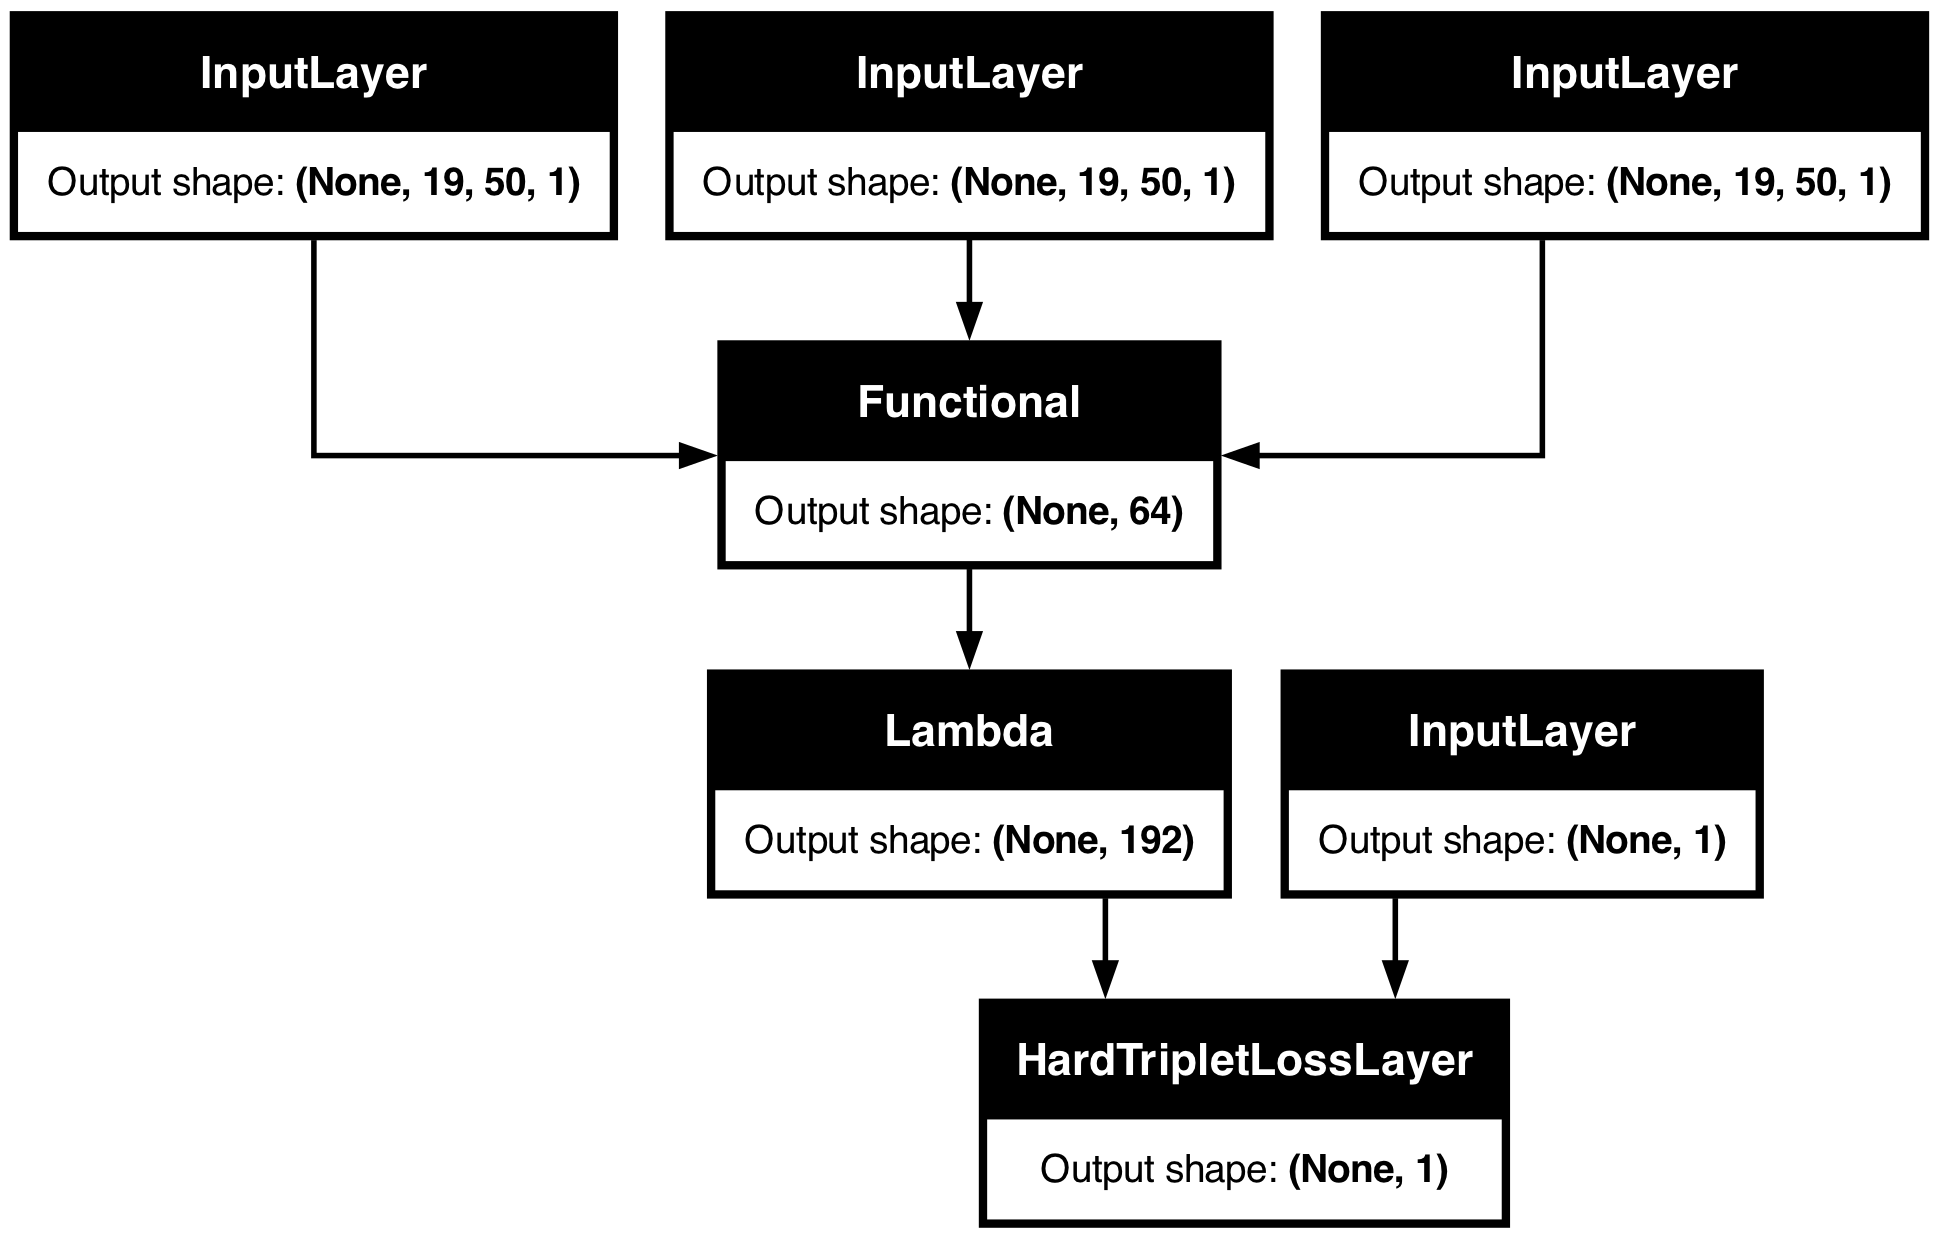

In [78]:
plot_model(siamese_net, to_file = 'model_fig.png', show_shapes = True)

In [77]:
input_shape = (19, 50, 1)  # Replace with your input shape
siamese_net = create_siamese_network(input_shape)
siamese_net.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor_input        │ (None, 19, 50, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positive_input      │ (None, 19, 50, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ negative_input      │ (None, 19, 50, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_25       │ (None, 64)        │    491,200 │ anchor_input[0][… │
│ (Functional)        │                   │            │ positive_input[0… │
│                     │                   │            │ negative_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ labels_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_7 (Lambda)   │ (None, 192)       │          0 │ functional_25[0]… │
│                     │                   │            │ functional_25[1]… │
│                     │                   │            │ functional_25[2]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hard_triplet_loss_… │ (None, 1)         │          0 │ labels_input[0][… │
│ (HardTripletLossLa… │                   │            │ lambda_7[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 491,200 (1.87 MB)

 Trainable params: 490,752 (1.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [79]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',   
    patience=5,           
    restore_best_weights=True  
)

In [80]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    'hard_triplet_loss.keras',     
    monitor='val_loss',   
    save_best_only=True,   
    mode='min',            )
    verbose = 1
)

In [ ]:
#run this cell for training only after running this cell continue to rest


siamese_net.fit(
    train_dataset,
    steps_per_epoch= 40000 //32,
    epochs=200,
    validation_data= test_dataset,
    validation_steps= 505601 // 32,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/200


2024-08-11 17:51:56.220742: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 56 of 10000
2024-08-11 17:52:16.099013: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 171 of 10000
2024-08-11 17:52:26.124788: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 223 of 10000
2024-08-11 17:52:46.123601: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 314 of 10000
2024-08-11 17:53:06.092451: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 423 of 10000
2024-08-11 17:53:16.196748: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:51: Filling up shuffle buffer (this may tak

 347/1250 ━━━━━━━━━━━━━━━━━━━━ 4:15 283ms/step - loss: 1.0323

In [142]:
def get_embeddings(model, data):
    # Assuming your triplet model returns embeddings as output
    embeddings = model.predict(data)
    return embeddings

In [144]:
siamese_net.load_weights('hard_triplet_loss.keras')

In [150]:
# Create a new model that outputs the embeddings from the 'lambda_13' layer
embedding_layer_model = Model(inputs=siamese_net.input, outputs=siamese_net.get_layer('lambda_13').output)


In [171]:

test_inputs = [x_test, x_test, x_test, y_test_encoded]


embeddings = embedding_layer_model.predict(test_inputs)


print(embeddings.shape)  


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 119s 13ms/step
(300000, 192)


In [172]:
print(embeddings[0, 0:64])

[-0.63065195  0.04775618  0.0390741   0.10822503  0.22937271  0.5066254
 -0.03596128  0.48922175 -0.45851117 -0.01138388  0.9659349   1.0595745
  0.16325344  0.7572728   0.29060462  0.86168873 -0.3437023  -0.17131378
 -0.00163202  0.02548165 -0.81695795  0.69369334 -0.25416848 -0.73131084
  0.4013377   0.00578809  0.5381066   0.6246824   0.05133454  0.46787748
  0.7323313  -0.47880876 -0.05314825 -0.23023117  0.5915777   0.19675833
 -0.25168726  0.94892234 -0.03044458 -0.40458906 -0.7091601   0.9615751
  0.01039604 -0.01759917  0.4106758  -0.098588   -0.5449029   0.26058838
  0.08677091 -0.84537894  0.9278918   0.35117602 -0.49242735  0.3743624
  0.08563002 -1.1969556   0.49526608 -0.6074199  -0.9971082   1.067253
 -0.01061572  0.20449808  0.8932692  -0.06417967]


In [173]:
print(embeddings[0, 64:128])


[-0.63065195  0.04775618  0.0390741   0.10822503  0.22937271  0.5066254
 -0.03596128  0.48922175 -0.45851117 -0.01138388  0.9659349   1.0595745
  0.16325344  0.7572728   0.29060462  0.86168873 -0.3437023  -0.17131378
 -0.00163202  0.02548165 -0.81695795  0.69369334 -0.25416848 -0.73131084
  0.4013377   0.00578809  0.5381066   0.6246824   0.05133454  0.46787748
  0.7323313  -0.47880876 -0.05314825 -0.23023117  0.5915777   0.19675833
 -0.25168726  0.94892234 -0.03044458 -0.40458906 -0.7091601   0.9615751
  0.01039604 -0.01759917  0.4106758  -0.098588   -0.5449029   0.26058838
  0.08677091 -0.84537894  0.9278918   0.35117602 -0.49242735  0.3743624
  0.08563002 -1.1969556   0.49526608 -0.6074199  -0.9971082   1.067253
 -0.01061572  0.20449808  0.8932692  -0.06417967]


In [154]:
model = Sequential()
model.add(Dense(192, input_shape=(192,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [155]:
checkpoints_2 = ModelCheckpoint(
    'best_model_1.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [158]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)

In [159]:
model.fit(
    embeddings, y_test,
    epochs=100,
    batch_size=32,
    callbacks = [checkpoints_2]
)

Epoch 1/100


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [162]:
y_test.shape

(300000, 3)

In [163]:
input_dim = embeddings.shape[1]

# Define a simple classifier model
classifier_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(3, activation='sigmoid')  # Change the output layer as per your requirement
])

classifier_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a checkpoint callback
checkpoints_2 = ModelCheckpoint(filepath='classifier_model.keras', save_best_only=True)

# Train the model
classifier_model.fit(
    embeddings, y_test,
    epochs=100,
    batch_size=32,
    callbacks=[checkpoints_2]
)

Epoch 1/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 335us/step - accuracy: 0.5809 - loss: 0.5109
Epoch 2/100
 445/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 339us/step - accuracy: 0.6418 - loss: 0.4694

/opt/homebrew/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 336us/step - accuracy: 0.6461 - loss: 0.4653
Epoch 3/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 338us/step - accuracy: 0.6586 - loss: 0.4521
Epoch 4/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 339us/step - accuracy: 0.6676 - loss: 0.4426
Epoch 5/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 337us/step - accuracy: 0.6749 - loss: 0.4349
Epoch 6/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 340us/step - accuracy: 0.6820 - loss: 0.4285
Epoch 7/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 339us/step - accuracy: 0.6838 - loss: 0.4261
Epoch 8/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 338us/step - accuracy: 0.6873 - loss: 0.4219
Epoch 9/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 339us/step - accuracy: 0.6903 - loss: 0.4185
Epoch 10/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 340us/step - accuracy: 0.6926 - loss: 0.4166
Epoch 11/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 338us/step - accuracy: 0.6954 - loss: 0.4143
Epoch 12/100
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 3s 340us/step - accuracy: 0.6966 - loss: 0.4120
Epoch 13

In [168]:
y_pred = classifier_model.predict(embeddings)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 2s 208us/step


In [169]:
from sklearn.metrics import classification_report
report = classification_report(y_test_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83    100000
           1       0.69      0.74      0.71    100000
           2       0.70      0.69      0.70    100000

    accuracy                           0.75    300000
   macro avg       0.75      0.75      0.75    300000
weighted avg       0.75      0.75      0.75    300000



In [170]:
from sklearn.manifold import TSNE

# Reduce dimensions to 3 using t-SNE
tsne = TSNE(n_components=3)
reduced_embeddings = tsne.fit_transform(embeddings)


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2], c=labels, cmap='viridis')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

# Add labels
ax.set_xlabel('dilantin 1')
ax.set_ylabel('keppra 2')
ax.set_zlabel('none 3')
plt.title('Seizure Med Visualization')

plt.show()
